*** PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources: https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises
github: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/00_pytorch_fundamentals_exercise_solutions.ipynb

In [1]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making  predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it  all together'}
what_were_covering                      

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making  predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it  all together'}

In [2]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural networks 
import matplotlib.pyplot as plt


#Check pytorch version
torch.__version__

'1.12.0+cu113'

from typing import Text
## 1. Data (preparing and loading)

Data can be almost anything... in maching learning.
* Excel spreadsheet
* Images of any kind
* Videos
* Audios
* DNA 
* Text

Machine learning  is a game of two parts:
1. Get data into a numerical representation.
2. Build model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known *parameter*.

In [3]:
# create *known* parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and testing sets (one of the most important cocepts in maching learning in general)

1. training set - course materials (60-80%)
2. validation set - practice exam (10-20%) (tune model patterns)
3. test set - final exam (10-20%) (see if the model is ready for the wild)



In [4]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"visualize,visualize,visualize"


In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train, 
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  

  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')

  #plot test data in green 
  plt.scatter(test_data, test_labels, c='r', s=4, label='testing data')

  #are there predictions?
  if predictions is not None:
    #plot predictions if they exist
    plt.scatter(test_data,predictions, c='g',s=4, label='Predictions')

  #show the legend
  plt.legend(prop={'size': 14})  

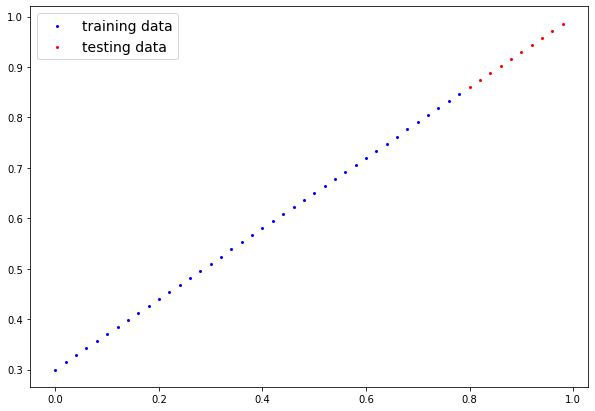

In [6]:
plot_predictions()

## 2. Build Model

Our first pytorch model

what our model does:
* start with random values (weights & bias)
* look at training data and adjust the random values to be better represent (or get closer to) the ideal values (the weights & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [7]:
# create linear regression model class y = ax + b
from torch import nn 
class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype =torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
    #forward method to define the computation in the model
  def forward(self,x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
    return self.weights * x + self.bias # this is the linear regression formula

## PyTorch model building essentials

* torch.nn - contains all of  the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.Parameter - what  parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network module, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method define what happens in the forward computation.

### Checking the  contents of our pytorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameter().`

In [8]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [10]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predcitions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

#same but inference mode() is preferred
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds  

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

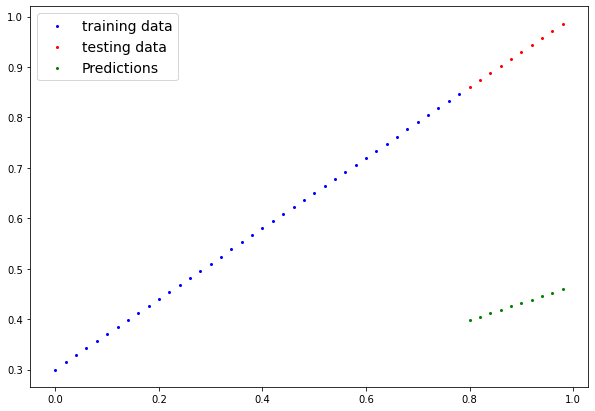

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model 

The whole idea for a model to move from some *unknown* parameters (these may be random) to some known parameters.
Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or ho wrong your models predictions are is to use a loss function.

* **loss funtion:** a function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **optimizer:** takes into account the losss of a model and adjusts the model's parameters (e.g. weights & bias) to improve the loss function.
    * **learning rate:** (a small lr results in small changes, a large lr results in  large changes)

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# check out model's parameter (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# setup a loss function (L1Loss or MAE loss) 
# torch.mean(torch.abs(y_preds-y))
loss_fn = nn.L1Loss()

#setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate = possiblly the most important hyperparameter

Q: which loss function and optimizer should I use?

A: this will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem, a loss function of `nn.L1Loss()` and an optimizer `torch.optim.SGD()` will suffice.

But for  a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()' (binary cross entropy loss).

### Building a training loop (and a testing loop) in Pytorch

things to do in training loop:
0. loop through the data
1. forward pass (this involves data moving through model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. loss backward - move backwards through the network to calculate the gradients of each of the parameters of model wrt loss
5. Optimizer step - use the optimizer to adjust model's parameters to try and improve the loss (**gradient descent**)

In [17]:
list(model_0.eval().parameters())  #test


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
with torch.inference_mode(): #test
  list(model_0.parameters())


In [19]:
torch.manual_seed(42)
# an epoch is one loop through the data...
# this is a hyperparameter bz we've set it
epochs = 100

#track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

## Training
# 0. Loop through data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()  # set all parameters require gradients 

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(y_pred,y_train)
  #print(f"Loss: {loss}")
  # 3. Optimizer zero gradient
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Optimizer step (perform (or update parameters) gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero then above in step 3 

  ## Testing
  model_0.eval()  # turns off gradient tracking
  with torch.inference_mode(): # turns off gradient tracking to make faster
  #with torch.no_grad(): # older pytorch code
   
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    
    # 2. calculate the loss
    test_loss = loss_fn(test_pred,y_test)
  
  # print out  
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f'Epoch: {epoch} | Train Loss: {loss} | Test loss: {test_loss}')
  
    # Print out mode state_dict()
    print(model_0.state_dict(),'\n')

Epoch: 0 | Train Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch: 10 | Train Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))]) 

Epoch: 20 | Train Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))]) 

Epoch: 30 | Train Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))]) 

Epoch: 40 | Train Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))]) 

Epoch: 50 | Train Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))]) 

Epoch: 60 | Train Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([

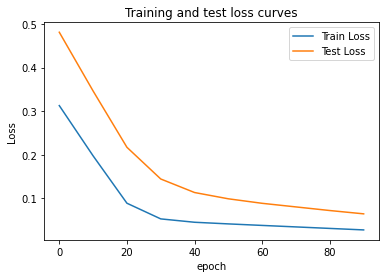

In [20]:
import numpy as np
# plot the loss curves 
plt.plot(epoch_count, train_loss_values, label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

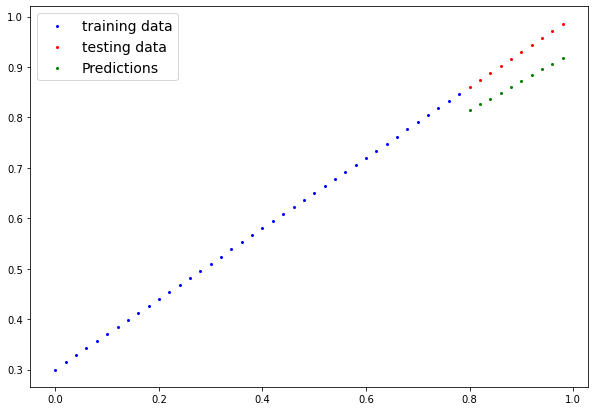

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions = y_preds_new)

## Saving a model in pytorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows to save a pytorch obect in python's pickle format
2. `torch.load()` - allows to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary


In [22]:
#saving a model 
from pathlib import Path

# 1. create model's directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth' #.pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
# check models
! ls -1 models

01_pytorch_workflow_model_0.pth


## Loading a pytorch model

Since we saved model's `state_dict()` rather the entire model, we'll create a new instance of model calss and load the saved `state_dict()` into that.

In [24]:
# to load from a saved state_dict, create a new instance of model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [26]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [27]:
# make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [28]:
# compare loaded model preds with original model preds
y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together 

Let's go back through the steps above and see it all in one place.

In [29]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'1.12.0+cu113'

Create device-agnosti code.

this means if we've got access to a GPU, our code will use it (for potentially faster computing). 

If no GPU is availabe, the code will default to using CPU.

In [30]:
#setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

#check ! nvidia-smi
! nvidia-smi

Using device: cuda
Sat Aug  6 05:30:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    12W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                     

### 6.1 Data

In [31]:
# create some data using the linear regression formula of y = weight * x + bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) #without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

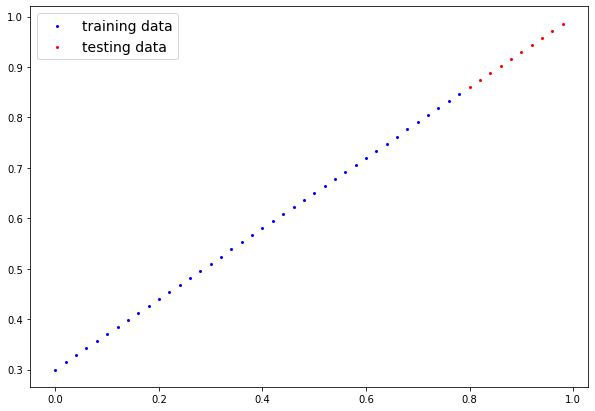

In [33]:
# plot (or visualize) the data : call plot_predicions function above
plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 Building a linear model



In [40]:
import torch
from torch import nn
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use. nn.linear() for creating the model parameter
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)  

# set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1,  model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [41]:
#check the current device model used
print(next(model_1.parameters()).device)

# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

cpu


device(type='cuda', index=0)

### 6.3 Training

* loss function 
* optimizer 
* training loop
* testing loop

In [43]:
# setup loss function
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

# training loop
torch.manual_seed(42)

epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #print out 
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f'Epoch: {epoch} | Train_loss: {loss} | Test_loss: {test_loss}')


Epoch: 0 | Train_loss: 0.5551779866218567 | Test_loss: 0.5739762187004089
Epoch: 10 | Train_loss: 0.439968079328537 | Test_loss: 0.4392664134502411
Epoch: 20 | Train_loss: 0.3247582018375397 | Test_loss: 0.30455657839775085
Epoch: 30 | Train_loss: 0.20954833924770355 | Test_loss: 0.16984669864177704
Epoch: 40 | Train_loss: 0.09433845430612564 | Test_loss: 0.03513690456748009
Epoch: 50 | Train_loss: 0.023886388167738914 | Test_loss: 0.04784907028079033
Epoch: 60 | Train_loss: 0.019956795498728752 | Test_loss: 0.045803118497133255
Epoch: 70 | Train_loss: 0.016517987474799156 | Test_loss: 0.037530567497015
Epoch: 80 | Train_loss: 0.013089174404740334 | Test_loss: 0.02994490973651409
Epoch: 90 | Train_loss: 0.009653178043663502 | Test_loss: 0.02167237363755703
Epoch: 100 | Train_loss: 0.006215683650225401 | Test_loss: 0.014086711220443249
Epoch: 110 | Train_loss: 0.00278724217787385 | Test_loss: 0.005814164876937866
Epoch: 120 | Train_loss: 0.0012645035749301314 | Test_loss: 0.013801801018

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [49]:
weight,bias

(0.7, 0.3)

6.4 Visualize loss and predictions

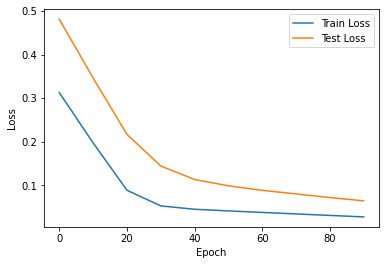

In [50]:
## visualize the loss and epoch
plt.plot(epoch_count, train_loss_values, label = 'Train Loss' )
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [55]:
## Make prediction
model_1.eval()

with torch.inference_mode():
  test_pred =  model_1(X_test)
test_pred.cpu()


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

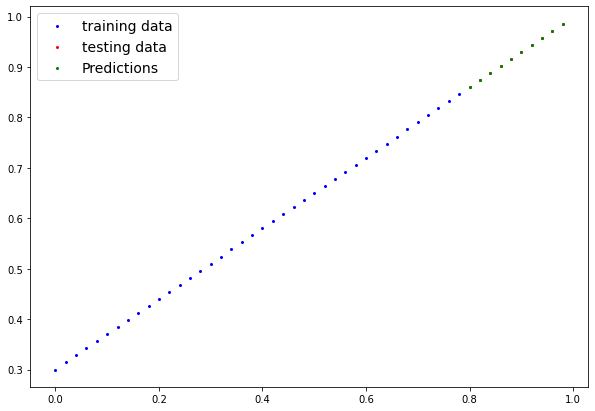

In [56]:
plot_predictions(predictions = test_pred.cpu())

## 6.5 Saving & Loading model

In [59]:
# saving
from pathlib import Path

# 1. create model dir
MODEL_DIR = Path('models')
MODEL_DIR.mkdir(parents=True, exist_ok=True)

# 2. create model saved path
MODEL_NAME = '01_pytorch_workflow_model_1'
MODEL_SAVE_PATH = MODEL_DIR / MODEL_NAME

# 3. save model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1


In [61]:
# load a pytoch model 

# create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [64]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [65]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_preds = loaded_model_1(X_test)
loaded_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

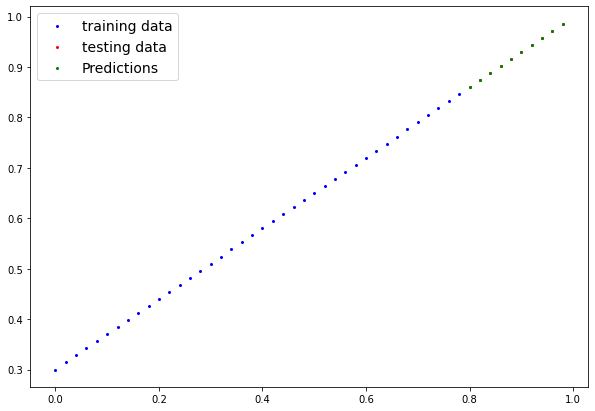

In [66]:
plot_predictions(predictions = loaded_preds.cpu())